In [1]:
import numpy as np
import cv2
import IPython.display as display
from PIL import Image
import time
import pandas as pd
from datetime import datetime

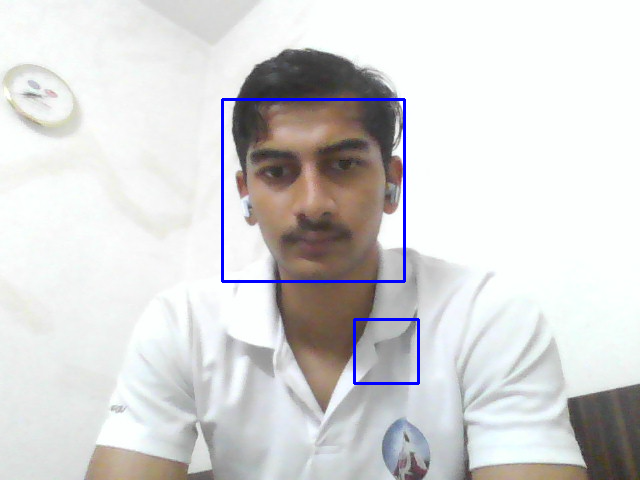

Webcam turned off.
Attendance saved to attendance.xlsx


In [4]:
# Load face cascade and initialize webcam (ensure correct path)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
if face_cascade.empty():
    raise IOError("Cannot load cascade file. Check the file path.")

cap = cv2.VideoCapture(0)

# Create an empty DataFrame with desired columns
attendance_df = pd.DataFrame(columns=["Name", "Date", "Time"])

frame_count = 0
logged_current_face = False  # flag to avoid multiple entries for a single detection

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5)

        # When a single face is detected and not already logged for this detection cycle:
        if len(faces) == 1 and not logged_current_face:
            name = input("Enter the name for the detected face (or leave blank for 'Unknown'): ").strip()
            if name == "":
                name = "Unknown"
            # Log entry only if this student isn't already logged
            if name not in attendance_df["Name"].values:
                current_time = datetime.now()
                new_entry = {
                    "Name": name,
                    "Date": current_time.strftime("%Y-%m-%d"),
                    "Time": current_time.strftime("%H:%M:%S")
                }
                attendance_df = pd.concat([attendance_df, pd.DataFrame([new_entry])], ignore_index=True)
                print("Logged attendance:", new_entry)
            else:
                print(f"{name} has already been logged.")
            logged_current_face = True  # Mark that the current detected face has been logged

        # Reset the flag if no face is detected or if multiple faces are detected
        if len(faces) != 1:
            logged_current_face = False

        # Draw rectangles on the frame for all detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display frame in notebook
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(frame_rgb)
        display.clear_output(wait=True)
        display.display(img)
        time.sleep(0.2)

        frame_count += 1
        if frame_count >= 50:  # Stop after 50 frames (or adjust as needed)
            break

except KeyboardInterrupt:
    print("Interrupted by user.")
finally:
    cap.release()
    print("Webcam turned off.")

# Save attendance to Excel
attendance_df.to_excel("attendance.xlsx", index=False)
print("Attendance saved to attendance.xlsx")
